<a href="https://colab.research.google.com/github/shravanikalapure/Machine-Learning/blob/main/Clustering_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Shravani Ranjeet Kalapure
#123B1B064
#Assignment 6

In [2]:
#Clustering Wine Data Using K-Means and Hierarchical Clustering

In [4]:
# K-Means and Hierarchical Clustering on Wine Dataset
# Unsupervised learning: clustering is done without using actual class labels

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

In [5]:
# Step 2: Load the Wine dataset
# The dataset contains 13 chemical features used to classify wine cultivars
wine = load_wine()
X = wine.data          # Features for clustering
y = wine.target        # Actual labels (only for reference)

In [6]:
# Step 3: Standardize the features
# Standardization is important so that all features contribute equally to the distance metric
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Step 4: Determine optimal number of clusters using evaluation metrics
# We test multiple cluster numbers (2 to 10) and compute evaluation scores
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    print(f"\nNumber of Clusters: {i}")
    print("K-Means Clustering Metrics")
    print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
    print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, kmeans_labels))
    print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, kmeans_labels))


Number of Clusters: 2
K-Means Clustering Metrics
Silhouette Score: 0.2650328591008738
Calinski-Harabasz Score: 69.0922872036386
Davies-Bouldin Score: 1.4943811430042517

Number of Clusters: 3
K-Means Clustering Metrics
Silhouette Score: 0.2848589191898987
Calinski-Harabasz Score: 70.9400080031512
Davies-Bouldin Score: 1.3891879777181646

Number of Clusters: 4
K-Means Clustering Metrics
Silhouette Score: 0.25422758316007776
Calinski-Harabasz Score: 52.75853530591114
Davies-Bouldin Score: 1.6954175827443763

Number of Clusters: 5
K-Means Clustering Metrics
Silhouette Score: 0.1836210510769814
Calinski-Harabasz Score: 45.85645649550628
Davies-Bouldin Score: 1.9120310619672225

Number of Clusters: 6
K-Means Clustering Metrics
Silhouette Score: 0.16899191019013057
Calinski-Harabasz Score: 39.33669334132915
Davies-Bouldin Score: 1.930960563081193

Number of Clusters: 7
K-Means Clustering Metrics
Silhouette Score: 0.17260155610949213
Calinski-Harabasz Score: 36.5108345821244
Davies-Bouldin S

In [8]:
# Step 5: Apply K-Means with 3 clusters (since there are 3 wine classes)
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X_scaled)

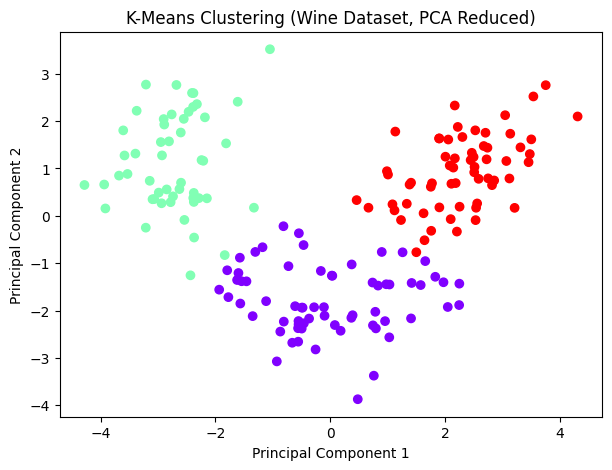

In [9]:
# Step 6: Visualize K-Means clusters using PCA for dimensionality reduction
# PCA reduces 13-dimensional data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='rainbow')
plt.title('K-Means Clustering (Wine Dataset, PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [10]:
# Step 7: Evaluate K-Means clustering
print("\nFinal K-Means Evaluation (3 Clusters)")
print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, kmeans_labels))
print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, kmeans_labels))


Final K-Means Evaluation (3 Clusters)
Silhouette Score: 0.2848589191898987
Calinski-Harabasz Score: 70.9400080031512
Davies-Bouldin Score: 1.3891879777181646


In [11]:
# Step 8: Hierarchical Clustering (Agglomerative)
# We use the 'ward' linkage method to minimize variance within clusters
for i in range(2, 10):
    hc = AgglomerativeClustering(n_clusters=i, linkage='ward')
    hc_labels = hc.fit_predict(X_scaled)

    print(f"\nNumber of Clusters: {i}")
    print("Hierarchical Clustering Metrics")
    print("Silhouette Score:", silhouette_score(X_scaled, hc_labels))
    print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, hc_labels))
    print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, hc_labels))


Number of Clusters: 2
Hierarchical Clustering Metrics
Silhouette Score: 0.2670131771272231
Calinski-Harabasz Score: 65.36083820586111
Davies-Bouldin Score: 1.4117573895082869

Number of Clusters: 3
Hierarchical Clustering Metrics
Silhouette Score: 0.2774439826952266
Calinski-Harabasz Score: 67.6474675044098
Davies-Bouldin Score: 1.4185919431857326

Number of Clusters: 4
Hierarchical Clustering Metrics
Silhouette Score: 0.22583665933475802
Calinski-Harabasz Score: 51.46414629882825
Davies-Bouldin Score: 1.7886506143765981

Number of Clusters: 5
Hierarchical Clustering Metrics
Silhouette Score: 0.18674235566758707
Calinski-Harabasz Score: 43.67927204722388
Davies-Bouldin Score: 1.9228554600490608

Number of Clusters: 6
Hierarchical Clustering Metrics
Silhouette Score: 0.17966642854438503
Calinski-Harabasz Score: 39.12896379154367
Davies-Bouldin Score: 1.8122878191320393

Number of Clusters: 7
Hierarchical Clustering Metrics
Silhouette Score: 0.1868534256022694
Calinski-Harabasz Score: 3

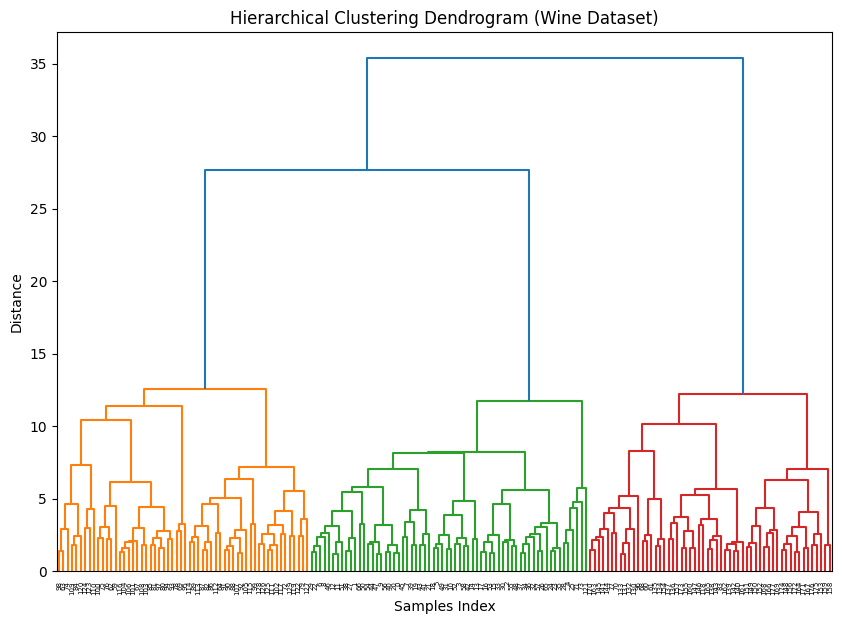

In [12]:
# Step 9: Create dendrogram for hierarchical clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Wine Dataset)')
plt.xlabel('Samples Index')
plt.ylabel('Distance')
plt.show()

In [13]:
# Step 10: Cut dendrogram to form 3 clusters (similar to known wine types)
hc_labels = fcluster(linked, t=3, criterion='maxclust')
print("Cluster labels for first 10 samples:", hc_labels[:10])

Cluster labels for first 10 samples: [2 2 2 2 2 2 2 2 2 2]


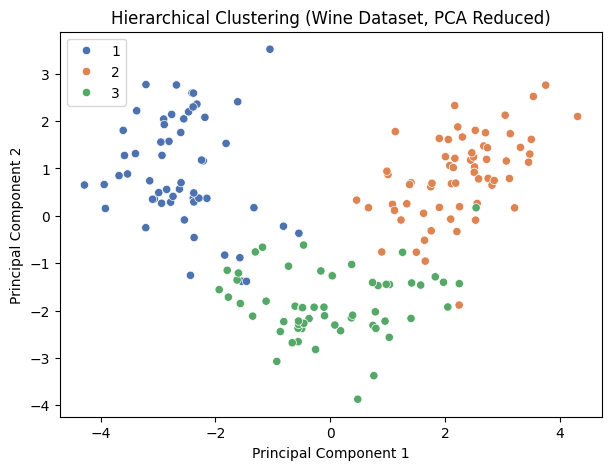

In [14]:
# Step 11: Visualize Hierarchical Clustering clusters (PCA reduced)
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hc_labels, palette='deep')
plt.title('Hierarchical Clustering (Wine Dataset, PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [15]:
# Step 12: Evaluate Hierarchical Clustering (3 clusters)
print("\nFinal Hierarchical Clustering Evaluation (3 Clusters)")
print("Silhouette Score:", silhouette_score(X_scaled, hc_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, hc_labels))
print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, hc_labels))



Final Hierarchical Clustering Evaluation (3 Clusters)
Silhouette Score: 0.2774439826952266
Calinski-Harabasz Score: 67.6474675044098
Davies-Bouldin Score: 1.4185919431857326


**SELF** **LEARING**

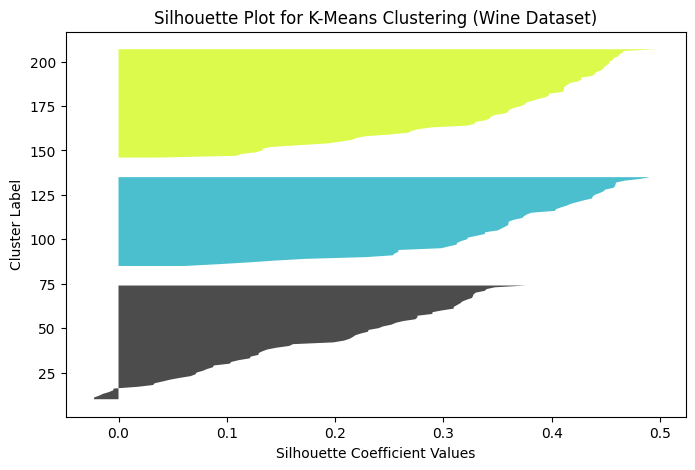

In [16]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# Calculate silhouette values for each sample
sil_vals = silhouette_samples(X_scaled, kmeans_labels)

y_lower = 10
plt.figure(figsize=(8,5))

# Plot silhouette values for each cluster
for i in range(3):  # 3 clusters
    ith_cluster_sil_vals = sil_vals[kmeans_labels == i]
    ith_cluster_sil_vals.sort()
    size_cluster = ith_cluster_sil_vals.shape[0]
    y_upper = y_lower + size_cluster
    color = cm.nipy_spectral(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_vals, facecolor=color, alpha=0.7)
    y_lower = y_upper + 10

plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for K-Means Clustering (Wine Dataset)")
plt.show()


1. Silhouette Plot for K-Means Clustering

While we calculated the Silhouette Score, a Silhouette Plot gives a visual insight into how well each data point fits within its cluster.

Points with high silhouette values (~1) are well-clustered.

Points with low or negative values (~0 or negative) are near the boundary or possibly misclassified.

Interpretation:

The plot helps identify clusters that are compact and well-separated.

Any samples with negative silhouette values may indicate points that are closer to another cluster, highlighting potential misclassification or overlap.

In [17]:
import pandas as pd

# Create a DataFrame with original features
df = pd.DataFrame(X, columns=wine.feature_names)
df['Cluster'] = kmeans_labels  # Add cluster labels

# Compute mean of each feature per cluster
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Analysis: Mean Feature Values per Cluster")
print(cluster_summary)


Cluster Analysis: Mean Feature Values per Cluster
           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  
Cluster                                                                        
0               2.973077  1.

2. Cluster Analysis with Original Features

To better understand what defines each cluster, we can examine the mean values of original features for each cluster. This connects clustering results to real chemical characteristics of wines.

Interpretation:

Each cluster shows distinctive feature patterns.

For example, one cluster may have higher alcohol and flavanoids, while another may have higher malic acid, helping to describe chemical profiles that distinguish wine types.

This analysis provides deeper insights into why clusters form and bridges the gap between numerical clustering and domain knowledge.